# Automatic Control in Python 
### author: Juan M. Acevedo-Valle
### date: 16/Apr/2018
## Class 15 & 16

In [1]:
%matplotlib inline
import pylab as plt
from control import tf
import control
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['figure.figsize'] = (11.0, 6.)

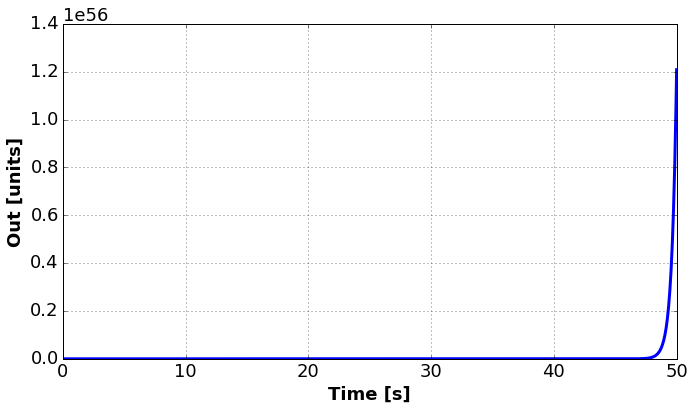

In [2]:
#Unstable System
P_s = control.tf([1],[1,-3,1])
T = np.linspace(0,50,1000)

T, y_step = control.step_response(P_s,T)
plt.plot(T,y_step,lw = 3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Out [units]", weight = 'bold')
plt.grid(True)
# plt.ylim([-0.5,5])

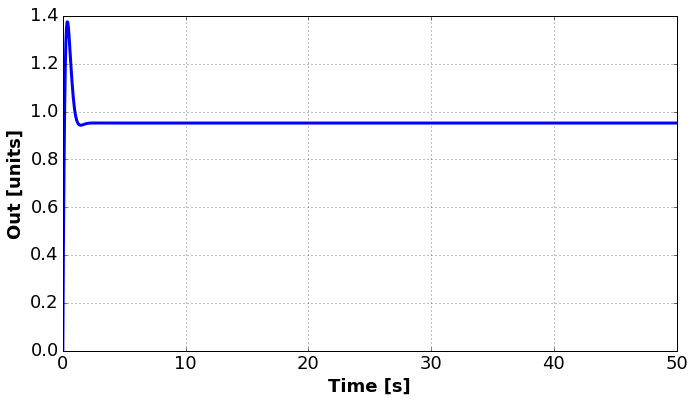

In [3]:
#Stabilization control (PD)
P_s = control.tf([1],[1,-3,1])
Kp = 20.
Td = 10.1/Kp
K_s = control.tf([Kp*Td, Kp],[1])
G_s = control.series(K_s,P_s)
Gcl_s = control.feedback(G_s,1)
# print(K_s)
# print(P_s)
# print(Gcl_s)
T = np.linspace(0,50,1000)

T, y_step = control.step_response(Gcl_s,T)
plt.plot(T,y_step,lw = 3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Out [units]", weight = 'bold')
plt.grid(True)
# plt.ylim([-0.5,5])

(-10, 10)

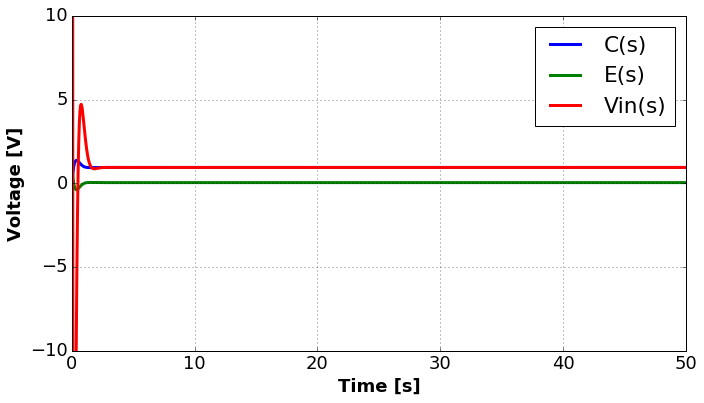

In [4]:
# Controller analysis
T, y_step = control.step_response(Gcl_s,T)
plt.plot(T,y_step,lw = 3)
E_s = np.array([0.]+[1.]*999)-y_step
plt.plot(T,E_s,lw=3)
plt.plot(T, Kp*E_s + Kp*Td*np.gradient(E_s,T),lw=3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)
plt.legend(['C(s)',"E(s)","Vin(s)"])
plt.ylim([-10,10])

0.7153807087306894
$t_p$=4.60504605046
$M_p$=0.0999999994487
$\zeta$=0.591155033799


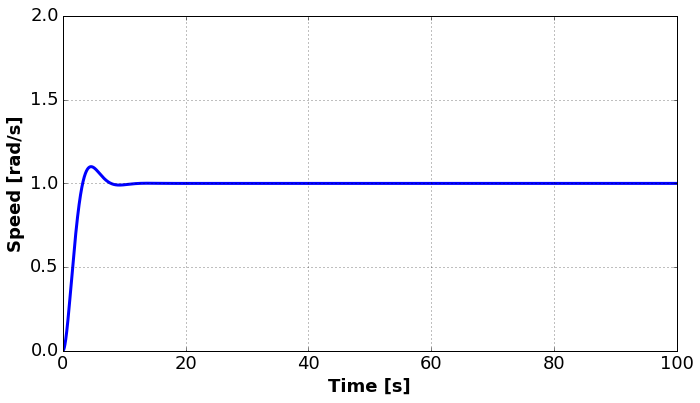

In [5]:
#Ejercicio diseño de control
T = np.linspace(0,100,100000)
# K=np.pi**2+0.25 #tp=1
K=(np.pi/(2*np.log(0.1)))**2+0.25 #Mp=0.1
# K=np.pi**2/100 + 1./4.#tp = 10
G_s = control.tf([K],[1,1,0])
Gcl_s = control.feedback(G_s,1)
T, y_step = control.step_response(Gcl_s,T)
plt.plot(T,y_step,lw = 3)


plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Speed [rad/s]", weight = 'bold')
plt.grid(True)
plt.ylim([0,2])

print(K)
print(r'$t_p$={}'.format(T[np.argmax(y_step)]))
print(r'$M_p$={}'.format(np.max(y_step)-1))
print(r'$\zeta$={}'.format(1./(2.*np.sqrt(K))))


      s + 2
-----------------
s^3 + 4 s^2 + 3 s



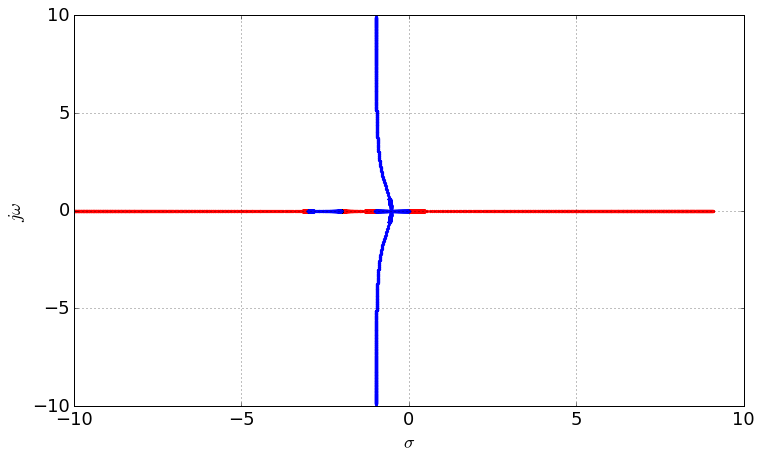

In [6]:
# Root Locus
matplotlib.rcParams['figure.figsize'] = (12.0, 7.)
from control import feedback,series
G = control.series(tf([1],[1,3]),tf([1,2],[1,1]))
G = control.series(G,tf([1],[1, 0]))
print(G)
K = np.concatenate((np.linspace(0,-1.,500),np.linspace(-1,-100.,500)))
for k in K:
    poles = control.pole(feedback(series(k,G),1))
    for pole, point in zip(poles,['r','r','r']):
        plt.scatter(np.real(pole),np.imag(pole),color=point,marker='.')
    plt.grid(True)
    plt.xlim([-5,1])
    plt.ylim([-2,2])
    plt.xlabel(r'$\sigma$')
    plt.ylabel(r'$j\omega$')
K = np.concatenate((np.linspace(0,1.,500),np.linspace(0,100.,500)))
for k in K:
    poles = control.pole(feedback(series(k,G),1))
    for pole, point in zip(poles,['b','b','b']):
        plt.scatter(np.real(pole),np.imag(pole),color=point,marker='.')
    plt.grid(True)
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.xlabel(r'$\sigma$')
    plt.ylabel(r'$j\omega$')


  s^2 + 6 s + 8
-----------------
s^3 + 4 s^2 + 3 s



(-10, 1)

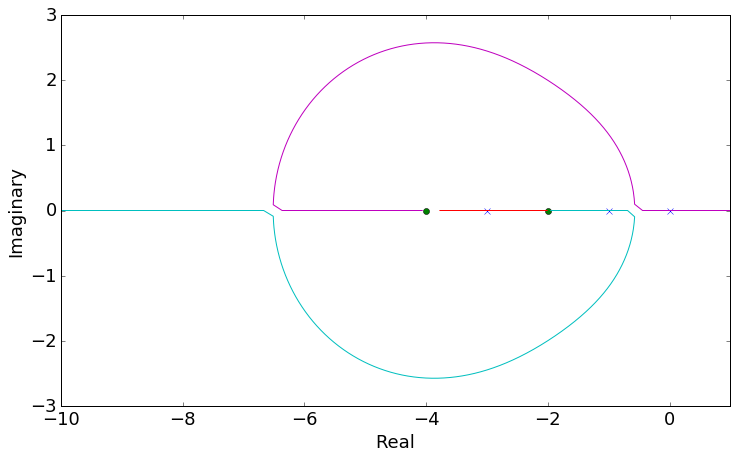

In [7]:
#rootlocus with control toolbox
G = control.series(tf([1,4],[1,3]),tf([1,2],[1,1]))
G = control.series(G,tf([1],[1, 0]))
print(G)
rl = control.root_locus(G,kvect=list(np.linspace(-20,100,10000)))
plt.xlim([-10,1])

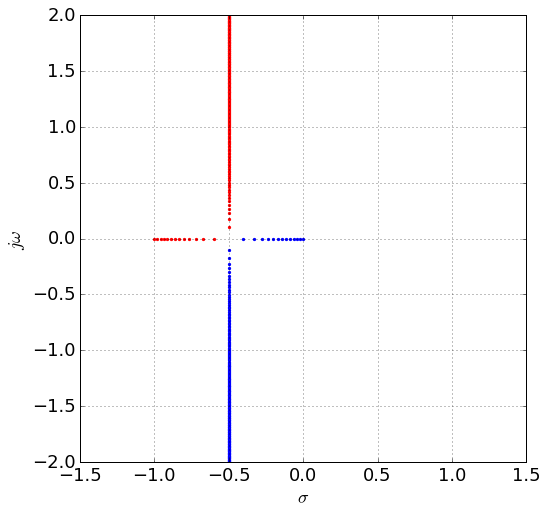

In [8]:
# The location of the routs of a system depends on the closedloop gain
# series, parallel, feedback
matplotlib.rcParams['figure.figsize'] = (8.0, 8.)
from control import feedback,series
K = np.linspace(0.,10,500)
for k in K:
    poles = np.roots([1.,1.,k])
    for pole, point in zip(poles,['r','b','k']):
        plt.scatter(np.real(pole),np.imag(pole),color=point,marker='.')
    plt.grid(True)
    plt.xlim([-1.5,1.5])
    plt.ylim([-2,2])
    plt.xlabel(r'$\sigma$')
    plt.ylabel(r'$j\omega$')

In [71]:
from numpy.polynomial import polynomial as pln
P1 =(2,8,3)
P2 =(1,6,8)
P3 =(1,4,3,0)
P4 =(2,6)
B = pln.polymul(P1,P2)
C = pln.polymul(P3,P4)
dK_ds = np.polysub(B,C)  
print(pln.polyroots(dK_ds))

[-7.54830369+0.j         -0.5596519 +0.j         -0.27935554-0.02944032j
 -0.27935554+0.02944032j]
